<a href="https://colab.research.google.com/github/a7482472/Major-project/blob/main/CNN_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5890 - loss: 175.1630 - val_accuracy: 0.6722 - val_loss: 0.9343
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 24.9531 - val_accuracy: 0.7498 - val_loss: 0.7355
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7061 - loss: 0.7394 - val_accuracy: 0.7440 - val_loss: 0.5964
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7315 - loss: 0.5904 - val_accuracy: 0.7707 - val_loss: 0.5324
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7565 - loss: 0.5214 - val_accuracy: 0.7882 - val_loss: 0.5179
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7718 - loss: 0.4870 - val_accuracy: 0.8039 - val_loss: 0.4661
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7905 - loss: 0.4345 - val_accuracy: 0.7988 - val_loss: 0.5281
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8085 - loss: 0.4169 - val_accuracy:

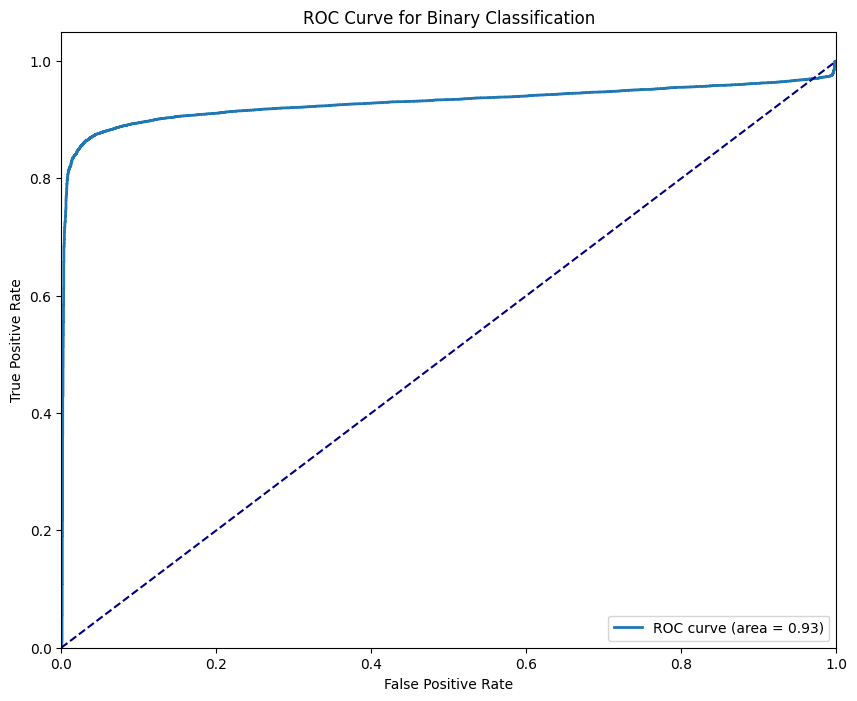

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input, GaussianNoise
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load and preprocess data without scaling
def load_data(csv_file, time_steps=10):
    data = pd.read_csv(csv_file)
    features = data[['heart_rate', 'blood_pressure', 'oxygen_saturation', 'respiratory_rate', 'temperature']].values
    labels = data['Label'].values

    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(labels[i + time_steps - 1])  # Label for the end of each sequence

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load data
csv_file = '/content/CVD_Vital_SIgns.csv'  # Path to uploaded file
X, y = load_data(csv_file)

# Build 1D CNN model with minimal configuration
def build_1d_cnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=16, kernel_size=3, activation='relu'),  # Small number of filters
        Flatten(),
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    return model

# Define model input shape based on X
input_shape = (X.shape[1], X.shape[2])  # (time_steps, features)
model = build_1d_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with few epochs and a large batch size
history = model.fit(X, y, epochs=20, batch_size=128, validation_split=0.2)  # Minimal training

# Make predictions
predictions = model.predict(X).flatten()

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int)

# Ensure all arrays are 1D
y = y.flatten()
binary_predictions = binary_predictions.flatten()
predictions = predictions.flatten()

# Evaluate the model
def evaluate_model(y_true, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot ROC curve for binary classification
    plot_roc_curve(y_true, y_pred_prob)

# Define function to plot ROC curve for binary classification
def plot_roc_curve(y_true, y_pred_prob):
    plt.figure(figsize=(10, 8))

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Binary Classification')
    plt.legend(loc="lower right")
    plt.show()

# Call evaluation with appropriate arguments
evaluate_model(y, binary_predictions, predictions)
